# Predicting Usage of a Video Game Research Server

## Project Final Report

##### Group 13 - Section 005

## Introduction

A research group in the Department of Computer Science at UBC, called The Pacific Laboratory for Artificial Intelligence (PLAI), is working on advancing AI into something safer and more reliable, that we can all trust. One of their projects is a research data collection project that focusses on generative AI (The Pacific Laboratory for Artificial Intelligence, 2023). PLAI has created an online server called "plaicraft.ai", that is a free version of Minecraft, that anyone can sign up for and play They collect data about the players and how they interact with the server, with the goal of using the data to create AI characters that respond to aspects in the video game in a way that's "smarter" than current non-player characters (Smith, 2023).

Using this collected data, the main goal of our project is to answer the question of "What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?", with a more specific question of "Can age, gender, experience, and average play time per session predict the subscription of a player?".

#### Description of Datasets

The first dataset we used to answer our question is the `players.csv` dataset.

This dataset is about 196 players in the Minecraft server, including:
- `experience` - (Amateur, Beginner, Regular, Pro, Veteran)
- `subscribe` - Subscription to the newsletter (TRUE/FALSE)
- `hashedEmail` - String of letters and numbers to identify player
- `played_hours`
- `name`
- `gender` - (Agender, Female, Male, Non-Binary, Two-Spirited, Other, Prefer not to say)
- `age`


The second dataset we used to answer our question is the `sessions.csv` dataset.

This dataset is about 1535 sessions of play, including:
- `hashedEmail`
- `start_time` - Including date and time
- `end_time` - Including date and time
- `original_start_time` 
- `original_end_time`

We used, from the `players.csv` data set, the `subscribe` variable as our response variable and `age`, `gender`, `experience` variables as three of our predictor variables. From both the `players.csv` data set and `sessions.csv`, we used the `hashedEmail` variable to combine the data from both data sets. And from the `sessions.csv` data set, we used the `original_start_time` and `original_end_time` to find the average play time per session for each player.

## Methods and Results

### Data Loading and Preprocessing  
In this stage, we performed the following tasks to prepare the data for analysis:  

- Imported the necessary libraries for data manipulation, visualization, and model training.  
- Loaded the `players.csv` and `sessions.csv`  
- Cleaned and pre-processed the data by handling missing values and ensuring all variables were in a usable format.  
- Encoded categorical variables such as `gender`, `experience level`, `start time` and `end time` using one-hot encoding to convert them into numerical representations.  
- Split the dataset into training and testing sets using a 65/35 ratio to ensure a fair evaluation of the model’s performance.  

### Exploratory Data Analysis  
To understand the distribution of our data and its potential influence on classification, we conducted the following steps:  

- Generated summary statistics, including the mean, standard deviation, and distribution of key predictors.  
- Visualized relationships between predictors and subscription status using scatter plots, box plots, and bar charts.  
- Identified any potential patterns or correlations that could impact classification accuracy.  

### Model Selection and Training  
The goal of this stage was to determine the best-performing k-value for our K-NN model:  

- Defined a K-NN model and a preprocessing recipe to prepare the data.  
- Conducted cross-validation on the training data using `vfold_cv` with `v=5` to ensure each fold had enough observations.  
- Evaluated model accuracy across a range of k-values (1 to 20) and plotted accuracy vs. k to identify the optimal number of neighbours.  
- Selected the best k-value by analyzing the accuracy trends in the cross-validation results.  

### Model Evaluation and Testing  
Once the optimal k-value was determined, we assessed the classifier’s performance using unseen data:  

- Trained a new K-NN model using the best k-value.  
- Used the trained model to make predictions on the test set.  
- Evaluated the model’s performance by computing accuracy, recall, and precision.  
- Constructed a confusion matrix to analyze the distribution of true positives, false positives, true negatives, and false negatives.  
- Interpreted the results and discussed potential limitations affecting model performance.

In [1]:
#Loading all necessary libraries for data analyis
library(tidyverse)
library(repr)
library(tidymodels)
library(themis)
library(cowplot)
library(RColorBrewer)
set.seed(525) 
options(repr.plot.height = 6, repr.plot.width = 7)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

The first step in our data analysis is to load the `players.csv` and `sessions.csv` datasets.

### 1. Data Loading and Preprocessing

In [2]:
players_url <- "https://raw.githubusercontent.com/sarahmontgomery04/project-data/refs/heads/main/players.csv"
players <- read_csv(players_url)
players

sessions_url <- "https://raw.githubusercontent.com/sarahmontgomery04/project-data/refs/heads/main/sessions.csv"
sessions <- read_csv(sessions_url)
sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


Now, we are going to compute the mean and median of the numbered statistics from the players dataset, that we're using, which is just the age.

In [3]:
players_age <- players |>
    summarize(mean_age = mean(Age), median_age = median(Age)) |>
    select(mean_age, median_age)
players_age

mean_age,median_age
<dbl>,<dbl>
NA,NA


There are "NA" values for both summary statistics indicating some of the observations have missing values for age, therefore we will repeat the process while removing these missing values. And these observations will not be involved in our final data analysis due to missing variables.

In [4]:
players_age <- players |>
    summarize(mean_age = mean(Age, na.rm = TRUE), median_age = median(Age, na.rm = TRUE)) |>
    select(mean_age, median_age)
players_age

mean_age,median_age
<dbl>,<dbl>
20.52062,19


##### Table 1: 
| Statistic | Age |
|---|-----|
| Mean | 20.52 |
| Median | 19.00 |


We've now learned that the mean and median ages are similar (Table 1), indicating the values are not skewed and some of the age values are missing. Now we'll tidy the data by removing `name` and `played_hours`, since they're not involved in our analysis.

In [5]:
players_tidy <- players |>
    select(-name, -played_hours)
players_tidy

experience,subscribe,hashedEmail,gender,Age
<chr>,<lgl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,Male,17
⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,Other,NA


Now, we'll look at the sessions dataset. From this dataset, we only want the `hashedEmail` and we want to find the average play time per session, which we'll call `mean_session_time_mins`, for each player using the `start_time` and `end_time`.

In [6]:
sessions_tidy <- sessions |>
    select(hashedEmail, start_time, end_time) |> 
    separate(start_time, into = c("start_date", "start_time"), sep = " ") |> 
    separate(end_time, into = c("end_date", "end_time"), sep = " ") |>
    mutate(start_time = as.POSIXct(start_time, format = "%H:%M")) |>
    mutate(end_time = as.POSIXct(end_time, format = "%H:%M")) |>
    mutate(total_time = as.numeric(abs(start_time - end_time), units = "mins")) |>  # Convert duration to numeric
    select(hashedEmail, total_time) |>
    group_by(hashedEmail) |> 
    summarize(mean_session_time_mins = as.double(mean(total_time, na.rm = TRUE)))  # Ensure it's double

sessions_tidy

hashedEmail,mean_session_time_mins
<chr>,<dbl>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,712
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,30
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,11
⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,33.73871
fe218a05c6c3fc6326f4f151e8cb75a2a9fa29e22b110d4c311fb58fb211f471,9.00000
fef4e1bed8c3f6dcd7bcd39ab21bd402386155b2ff8c8e53683e1d2793bf1ed1,72.00000


Since, we want to use variables from both datasets, we will merge the date using the `hashedEmail` variable and then remove it, since it's unnecessary for the rest of the data analysis. Next, we use convert the `subscribe` variable into a categorical, which is important for classification.

In [7]:
plaicraft_data <- merge(sessions_tidy, players_tidy, by = "hashedEmail") |>
    select(-hashedEmail) |>
    mutate(subscribe = as.factor(subscribe))

plaicraft_data

mean_session_time_mins,experience,subscribe,gender,Age
<dbl>,<chr>,<fct>,<chr>,<dbl>
712,Regular,TRUE,Male,20
30,Pro,FALSE,Male,21
11,Beginner,TRUE,Male,17
⋮,⋮,⋮,⋮,⋮
33.73871,Amateur,TRUE,Male,23
9.00000,Amateur,TRUE,Male,17
72.00000,Beginner,TRUE,Male,20


Before using our dataset for training, we need to clean and transform categorical variables into numerical values for compatibility with machine learning models.

#### Filtering Gender
We start by filtering the dataset to include only players whose gender is either "Male" or "Female". This step is necessary because other gender categories might have too few observations, which could lead to unreliable model performance.

#### Label Encoding
Next, we apply label encoding to convert categorical variables into numerical values:
- **Experience Level**: We transform the `experience` variable into ordered numeric values, mapping levels from "Beginner" to "Veteran" as 1 to 5.
- **Gender**: We convert gender into a binary numeric variable, where "Male" is assigned 1 and "Female" is assigned 0.

In [8]:
plaicraft_clean <- plaicraft_data |>  
    filter(gender == "Male"| gender == "Female")|>                   #only choose male and female
mutate(experience = as.numeric(factor(experience, 
                                        levels = c("Beginner", 
                                                   "Amateur", 
                                                   "Regular", 
                                                   "Pro", 
                                                   "Veteran"))),
        gender = as.numeric(gender == "Male"))


plaicraft_clean

mean_session_time_mins,experience,subscribe,gender,Age
<dbl>,<dbl>,<fct>,<dbl>,<dbl>
712,3,TRUE,1,20
30,4,FALSE,1,21
11,1,TRUE,1,17
⋮,⋮,⋮,⋮,⋮
33.73871,2,TRUE,1,23
9.00000,2,TRUE,1,17
72.00000,1,TRUE,1,20


#### Splitting the Dataset into Training and Testing Sets

To train and evaluate our model, we need to split the dataset into training and testing subsets.

#### Stratified Sampling
We perform stratified sampling, which helps maintain the proportion of subscribers and non-subscribers in both the training and testing sets, to prevent imbalances

#### Training and Testing Sets
- **`plaicraft_train`**: Contains 65% of the data, which will be used for training the model.
- **`plaicraft_test`**: Contains the remaining 35% of the data, which will be used for evaluating the model’s performance.

Finally, we check the number of observations in both subsets.

This split ensures that our model learns from a representative portion of the dataset while keeping a separate set for unbiased performance evaluation.

In [9]:
plaicraft_split <- initial_split(plaicraft_clean, prop=0.65, strata = subscribe)

plaicraft_train <- training(plaicraft_split)
                   
plaicraft_test <- testing(plaicraft_split)

plaicraft_train

nrow(plaicraft_train)
nrow(plaicraft_test)

mean_session_time_mins,experience,subscribe,gender,Age
<dbl>,<dbl>,<fct>,<dbl>,<dbl>
30,4,FALSE,1,21
18,1,FALSE,0,37
5,2,FALSE,1,21
⋮,⋮,⋮,⋮,⋮
80,4,TRUE,1,17
9,2,TRUE,1,17
72,1,TRUE,1,20


[1] 69

[1] 38

We can see that there are 69 rows in our training data, and 38 rows in our testing data.

### 2. Exploratory Data Analysis

Before building our classifier, we summarize the dataset to gain insights into the distribution of variables based on subscription status. Since our dataset contains multiple predictors, we visualize them separately. 

#### Calculating Mean Values by Subscription Status  
We group the data by subscription status (subscribed or not). Then compute:  
- **Count**: The number of observations in each subscription group.  
- **Mean of Other Variables**: We calculate the mean of all remaining numerical variables in the dataset, except for the count itself.  

In [10]:
plaicraft_mean <- plaicraft_clean |>
    group_by(subscribe)|>
    summarize(count = n(),
              across(-count, mean))
plaicraft_mean

subscribe,count,mean_session_time_mins,experience,gender,Age
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,27,29.84549,3.037037,0.7777778,22.81481
TRUE,80,69.57311,2.712500,0.7750000,19.97500


##### Table 2: Means of Numerical Variables by Subscription Status
| Subscription Status and Count | Mean Session Time | Experience | Gender | Age |
|---|---|---|---|---|
|  | (mins) | (beginner = 1, veteran = 5) | (female = 0, male = 1) | (years) | 
|not subscribed (27)| 29.85 | 3.04 | 0.78 | 22.81 |
|subscribed (80)| 69.57 | 2.71 | 0.78 | 19.98 |

There are more subscribed players in the dataset and more males. This has us predicting, people with a higher experience level and a higher age are less likely to subscribe to the newsletters and people who play more are more likely to be subscribed (Table 2).

We can also find the standard deviation for the two participation levels.

In [11]:
plaicraft_sd <- plaicraft_clean |>
    group_by(subscribe)|>
    summarize(across(everything(),sd))
plaicraft_sd

subscribe,mean_session_time_mins,experience,gender,Age
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,36.25187,1.556166,0.4236593,8.892681
TRUE,169.24916,1.304265,0.4202169,6.203256


##### Table 3: Standard Deviation of Numerical Variables by Subscription Status
| Subscription Status and Count | Mean Session Time | Experience | Gender | Age |
|---|---|---|---|---|
|  | (mins) | (beginner = 1, veteran = 5) | (female = 0, male = 1) | (years) | 
|not subscribed (27)| 36.25 | 1.56 | 0.42 | 8.89 |
|subscribed (80)| 169.25 | 1.30 | 0.42 | 6.20 |

This shows how crucial it is to center and scale the data when we construct the model later (Table 3).

#### Visualization
We can inspect each predictor separately to find their properties relating to TRUE and FALSE values.

In [12]:
figure1 <- ggplot(plaicraft_clean, aes(y = mean_session_time_mins, x = Age, color = subscribe))+
    geom_jitter(width = 0.3, height = 0.1, size = 3, alpha = 0.8)+
    labs(y="Mean Session Time (mins)",
         x="Age of Player",
         color="Subscrition Status")+
    ggtitle("Figure 1: Subscribe Based on Age and Mean Session Time")+
    theme(text = element_text(size = 15)) +
    scale_colour_brewer(palette = "Paired")

In [13]:
figure2 <- ggplot(plaicraft_clean, aes(x=experience, fill=subscribe))+
    geom_bar(position="fill") +
    labs(x="Experience Level",
         y="Proportion",
         fill="Subscrition Status")+
    ggtitle("Figure 2: Proportion of Subscribe by Experience")+
    theme(text = element_text(size = 15))+
    scale_fill_brewer(palette = "Paired")

In [14]:
figure3 <- ggplot(plaicraft_clean, aes(x=gender, fill=subscribe)) +
    geom_bar(position="fill") +
    labs(x="Gender",
         y="Proportion",
         fill="Subscrition Status") +
    ggtitle("Figure 3: Proportion of Subscribe by Gender") +
    theme(text = element_text(size = 15)) +
    scale_fill_brewer(palette = "Paired")

In [15]:
figure4 <- ggplot(plaicraft_clean, aes(x=mean_session_time_mins, y=subscribe, color=subscribe)) +
    geom_jitter(width = 0.3, height = 0.1, size = 3, alpha = 0.8) +
    scale_x_continuous(limits = c(0, 260)) +
    labs(x="Mean Session Time (mins)",
         y="Subscribe",
         color="Subscrition Status") +
    ggtitle("Figure 4: Subscribe Based on Mean Session Time") +
    theme(text = element_text(size = 15))  +
    scale_colour_brewer(palette = "Paired")

Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”


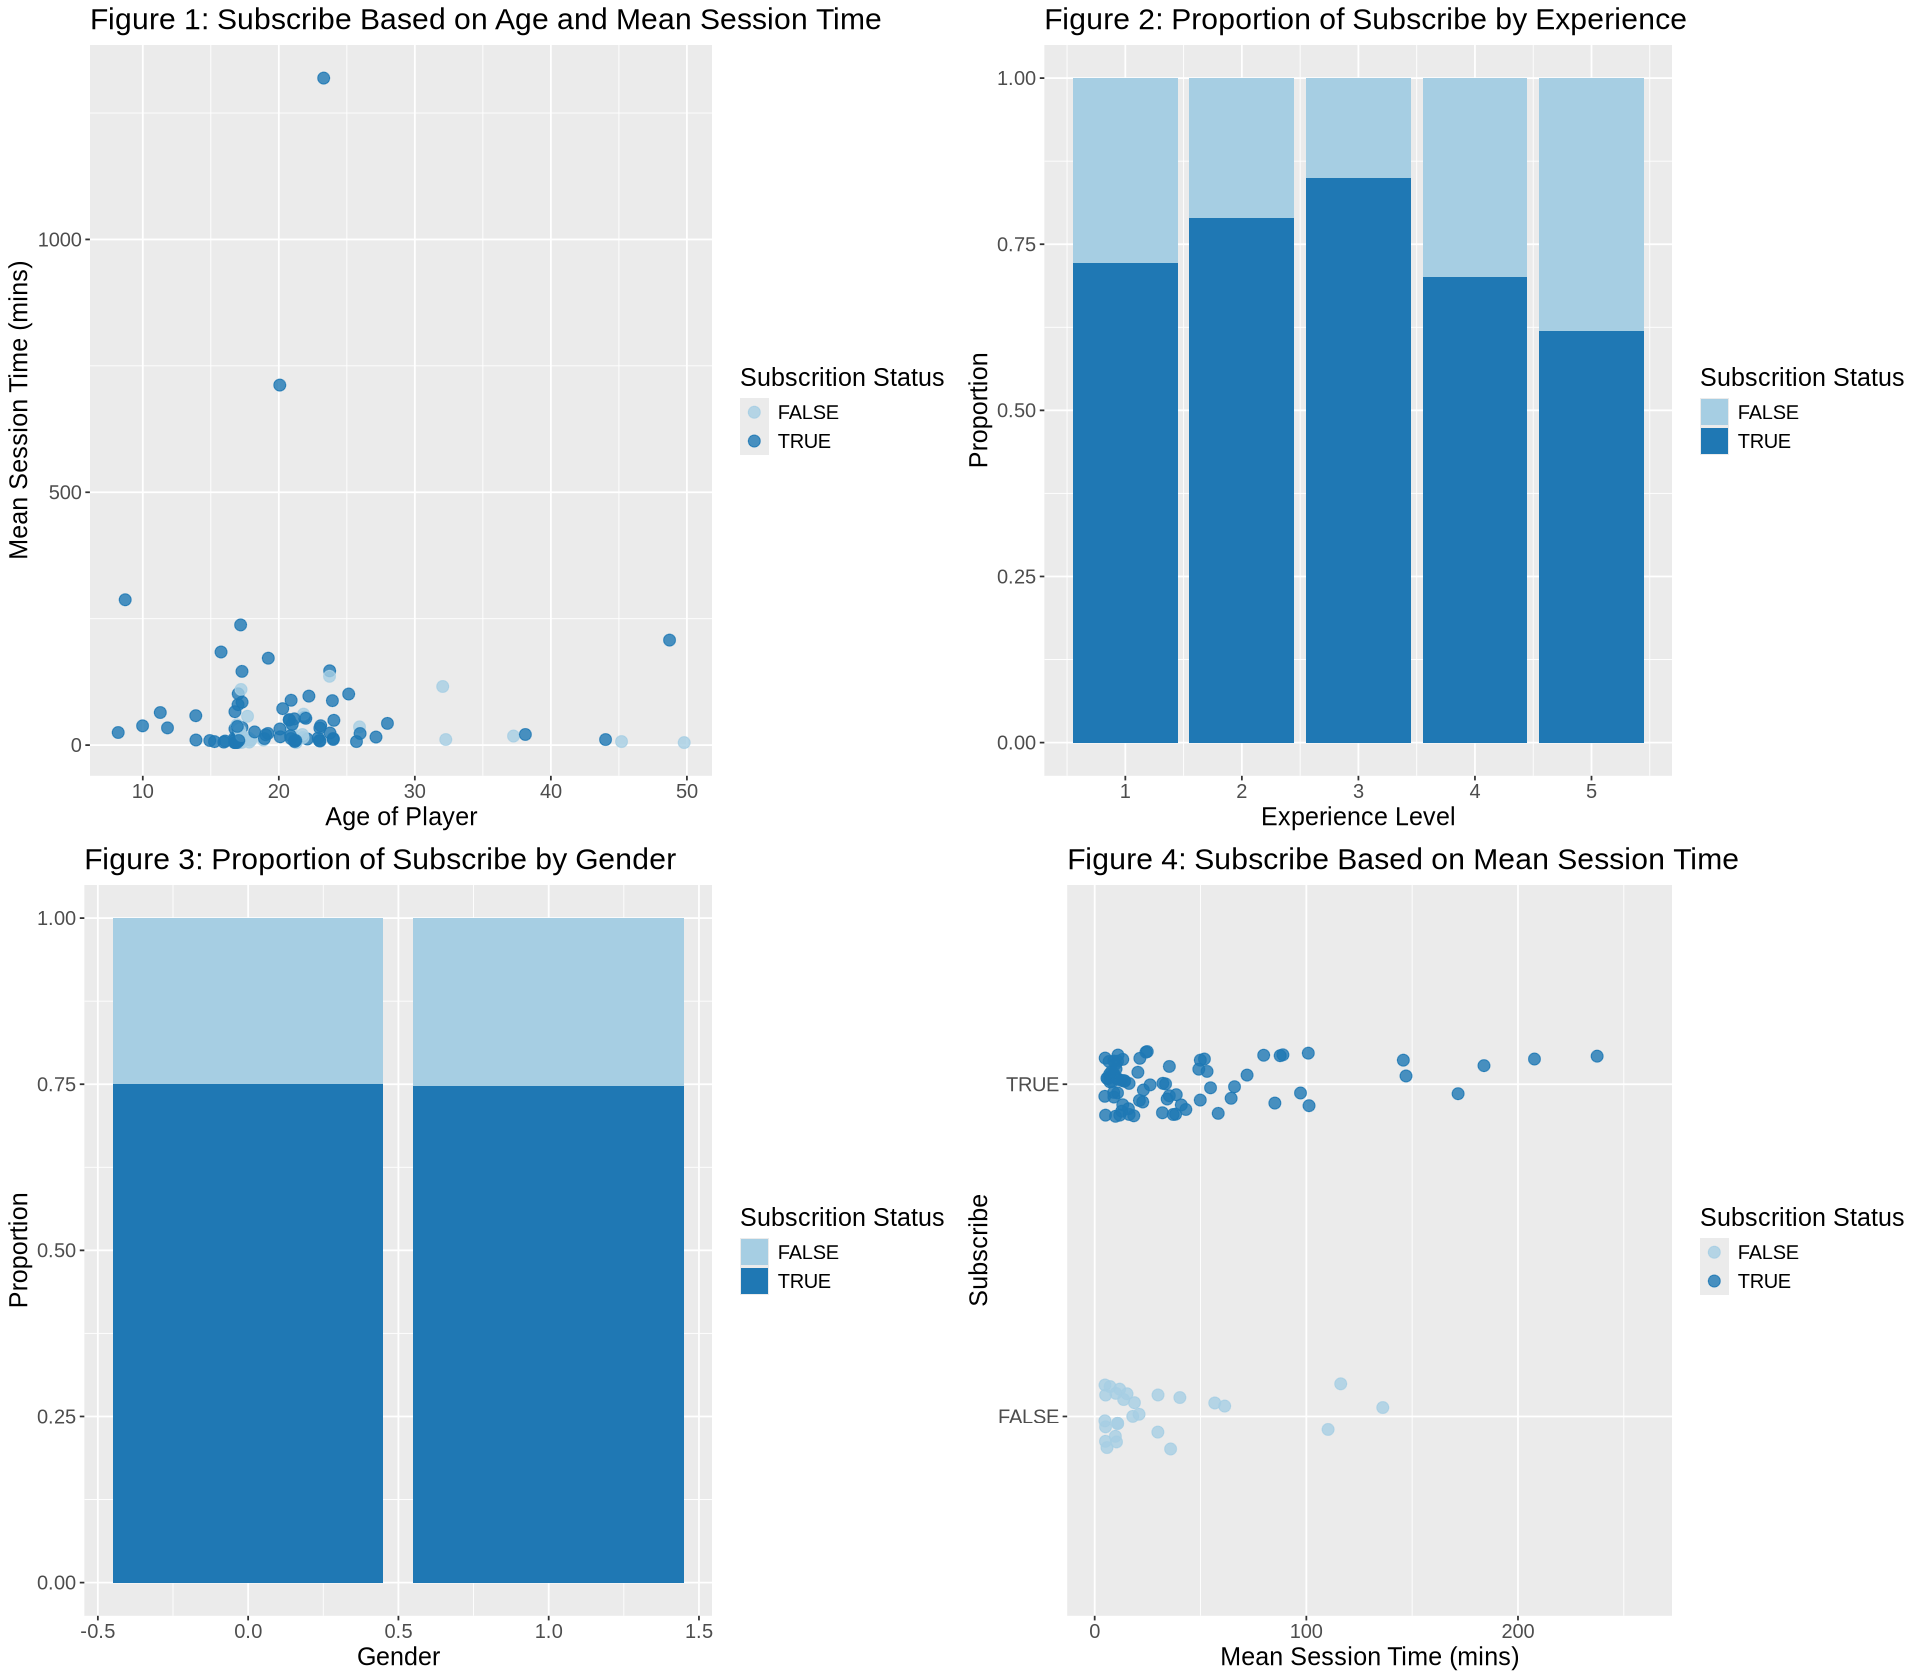

In [16]:
options(repr.plot.width = 16, repr.plot.height = 14)
figures <- plot_grid(figure1, figure2, figure3, figure4)
figures

Looking at the above figures the relationship between the predictors and the response variable (subscription status) looks non-linear. This is prevalent in Figure 1, where the data is very clumped. Additionally, since two of our predictors were categorical, the values are only whole numbers and therefore decrease any linear relationship there could've been. Therefore, we want to use a K-NN Classification model to predict subscription, which is a categorical variable.

### 3. Model Selection and Training
We can now construct the classification model and begin analyzing the data.  We would start by fine-tuning the classifier and selecting the optimal k-value.

Creating the recipe, centering, and scaling each of our predictors is our first step.

In [17]:
plaicraft_recipe <- recipe(subscribe ~ ., data = plaicraft_train)|>
            step_scale(all_predictors())|>
            step_center(all_predictors())


Now we'll test K-values between 1 and 20, because we don't have many samples, using 5-fold cross-validation.

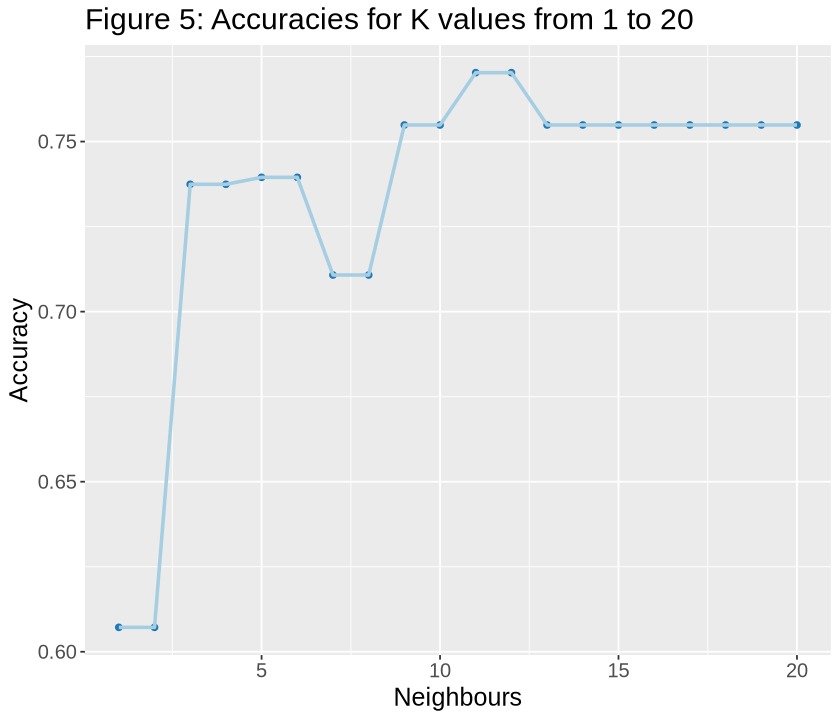

In [18]:
set.seed(525)
options(repr.plot.height = 6, repr.plot.width = 7)
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

plaicraft_vfold <- vfold_cv(plaicraft_train, v = 5, strata = subscribe)

tune_results <- workflow() |>
                 add_recipe(plaicraft_recipe) |>
                 add_model(knn_tune) |>
                 tune_grid(resamples = plaicraft_vfold, grid = tibble(neighbors = c(1:20))) |>
                 collect_metrics()|>
                 filter(.metric == 'accuracy')

cross_val_plot <- ggplot(tune_results, aes(x = neighbors, y = mean)) +
                 geom_point(colour = "#1F78B4") +
                 geom_line(colour = "#A6CEE3",
                          linewidth = 1) +
                 labs(x = 'Neighbours', 
                      y = 'Accuracy') +
                 ggtitle("Figure 5: Accuracies for K values from 1 to 20")+
                 theme(text = element_text(size = 15)) 

cross_val_plot

We observe a peak accuracy around **k = 11 or 12** (Figure 5), where the classifier achieves its highest performance. For **k** values greater than 11, the accuracy declines and then is stabilized at a constant level, possibly due to overfitting. We choose **k = 11** as the optimal value, due to the limited size of the data, to maximize accuracy and minimize overfitting.

### 4. Model Evaluation and Testing 

Finally, we create the classifier.

In [19]:
set.seed(525)
plaicraft_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 11) |>
            set_engine("kknn") |>
            set_mode("classification")

plaicraft_fit<- workflow()|>
                add_recipe(plaicraft_recipe) |>
                add_model(plaicraft_spec) |>
                fit(data = plaicraft_train)

Now we evaluate the performance of our classifier.

In [20]:
set.seed(525)
plaicraft_result <- predict(plaicraft_fit, plaicraft_test)|>
    bind_cols(plaicraft_test)

plaicraft_result

.pred_class,mean_session_time_mins,experience,subscribe,gender,Age
<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
TRUE,10,5,FALSE,1,19
TRUE,12,2,FALSE,0,17
TRUE,23,3,TRUE,1,19
⋮,⋮,⋮,⋮,⋮,⋮
TRUE,20.50000,4,TRUE,1,19
TRUE,16.00000,2,TRUE,1,27
TRUE,33.73871,2,TRUE,1,23


 We can now compute the classifier's accuracy and create a confusion matrix.

In [21]:
plaicraft_accuracy <- plaicraft_result |>
    metrics(truth = subscribe, estimate = .pred_class)|>
    filter(.metric == "accuracy")

plaicraft_accuracy

confusion<- plaicraft_result|>
    conf_mat(truth = subscribe, estimate = .pred_class)

confusion

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7631579


          Truth
Prediction FALSE TRUE
     FALSE     1    0
     TRUE      9   28

#### Model Performance Evaluation  

The class of particular interest in this classification is the "TRUE" class in `subscribe`, representing individuals who will play more than one session. 

By examining the confusion matrix, we categorize the results as follows:

- **True Positive (TP):** A subscribed player that was correctly classified as subscribed (28)
- **False Positive (FP):** An unsubscribed player that was incorrectly classified as subscribed (9)
- **True Negative (TN):** An unsubscribed player that was correctly classified as unsubscribed (1)
- **False Negative (FN):** A subscribed player observation that was incorrectly classified as unsubscribed (0)

From these values, we can calculate the following metrics:
##### Table 4: Model Evaluation Metrics
| Metric | Value |
|----------|-----|
| Accuracy | 0.76 |
| Recall | 1.00 |
| Precision | 0.76 |


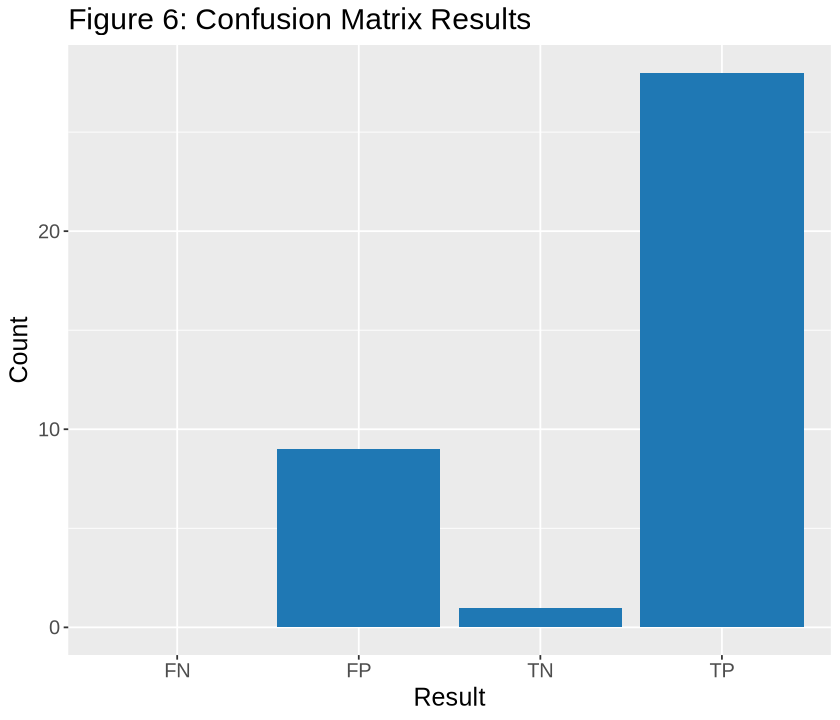

In [22]:
options(repr.plot.height = 6, repr.plot.width = 7)
figure5 <- tibble("result" = c("TP", "FP", "TN", "FN"), 
                  "value" = c(28,9,1,0)) |>
    ggplot(aes(x = result, y = value)) +
        geom_bar(stat = "identity", fill = "#1F78B4") +
        labs(x = "Result", y = "Count", title = "Figure 6: Confusion Matrix Results") +
        theme(text = element_text(size = 15))
figure5

## Discussion

It was found that predicting the subscription status of a player, using age, mean session play time, gender (only males and females), and experience level using a K-NN classification model with 11 neighbours, gave an accuracy of 0.76, a recall of 1.00, and a precision of 0.76, when tested on unseen data (Table 1). This is a fairly low accuracy, that indicates the subscription of a player would only be predicted correctly 3 out of 4 times. Additionally, the recall is perfect, however, out of 38 predictions, the model predicted TRUE for subscription 37 times, thus the high value for recall is only due to the model predicting TRUE for almost every observation and the model was a poor predictor of people who were unsubscribed, since there were 9 false positives out of 10 unsubscribed observations (Figure 6).

It is expected to find that the model had a low accuracy and wasn't good at predicting unsubscribed players, since there was a larger amount of susbcribed players (Table 2). The observations were fairly mixed and there were no distinct areas that were concentrated as subscribed/unsubscribed in the variables (Figure 1, Figure 2, Figure 3, Figure 4). None of the variables showed distinct patterns or correlation to subscription. Additionally, the predictors had similar mean values (Table 2) and standard deviations (Table 3), except for mean session play time, which indicated a lot of the observations, whether subscribed or not, were focused around the same areas. 

One key limitation of our prediction model is the way categorical variables were encoded. When numerically encoding categorical variables and removing gender other than males or females, scaling effects can become a limiting factor, which directly influence distance calculations and disproportionately affect model predictions. Another limitation is the small sample size. In K-NN, predictions rely on nearby neighbors, there may not be enough representative neighbors for each classification, increasing the risk of overfitting. Additionally, the presence of outliers can disproportionately impact classification results.

These results could indicate that game related newsletters that these players can subscribe to isn't targeted towards a specific audience of players and are targeted to people of any experience-level, gender, play time, and age. This is important for the creators of these newsletters because they're reaching more diverse audience of players. Another explanation is that there is a characteristic or behaviour that wasn't tracked in this data that is more predictive of subscription to game related newsletters, such as type of game the players typically play. Lastly, this could also tell us that the Plaicraft server and project has not reached a large range of players or enough players to make accurate predictions, reulting in a insufficient amount of data.

This can lead us to the following questions for further discovery and analysis:
- Could more or less predictors affect the ability for K-NN classification model to predict subscription?
- If we had access to more data, would this change the accuracy?
- What characteristics, other than the ones studied, impact subscription to the newsletter?
- Is the Plaicraft server reaching a large variety of players?

### References

(1) Smith, A. (2023, September 28). plaicraft.ai launch - Pacific Laboratory for Artificial Intelligence. Pacific Laboratory for Artificial Intelligence. https://plai.cs.ubc.ca/2023/09/27/plaicraft/

(2)  The Pacific Laboratory for Artificial Intelligence. (2023, September 28). Home Page - Pacific Laboratory for Artificial Intelligence. Pacific Laboratory for Artificial Intelligence. https://plai.cs.ubc.ca/